<a href="https://colab.research.google.com/github/Engineer-Gustavo-Softworks/TCM---Bidimensional/blob/main/Trabalho_Bidimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aleta de seção não variado

In [ ]:
from numpy import *
from scipy.integrate import *
import matplotlib.pyplot as plt
from math import *

In [ ]:
### Propriedades do ar
T0 = 80.+273.     # Temp inicial [k]
Tamb = 25.+273.   # Temp ambiente [k]
kar = 0.02551     # Coef. condutivo Ar (W/m.K)
L = 0.115         # Altura (m)
cpar = 1007       # Calor Específico Cp (J/kg K)
Pr = 0.7296       # Número de Prandt
visc = 1.562e-5   # Viscosidade Cinemática  (m2/s)
g = 9.81          # Gravidade (m/s2)
B = 1/T0          # Coef. de Expasão Volumétrica

Ra = g*B*(T0 - Tamb)*Pr/pow(visc,2)

Nu =((576/pow(Ra,2))+(2.873/pow(Ra,0.5)))

h = Nu*kar/L

In [ ]:
T0 = [80.+273.]          # Temp inicial [k]
Tamb = 25.+273           # Temp ambiente [k]
w = 14e-4                 # Espessura (m)
Kal = 229                # Coef. condutivo Aluminio (W/m.K)
p = 2701.1               # densidade do material (em kg/m³)
cp = 938.3               # Capacidade calorífica específica (em J/kg·K)
c = 0.10                 # Comprimento
tempo = 40*60            # tempo (s)

Pe = 2*(w+L)
Ab = w*L
Ac = c*L

it1 = 2401                 # número de iterações da temperatura
it2 = 401                  # número de iterações do espaço
y = linspace(0,L,it2)      # vetor do comprimento y
z = linspace(0,L,it2)      # vetor do comprimento z
t = linspace(0,tempo,it1)  # vetor do tempo
dz= L/(it2-1)              # passo do método
dy= L/(it2-1)              # passo do método

condicao0 = concatenate([T0,(25.+273)*ones(it2-1)])

In [ ]:
def resultado (h):

## Direção Z
 def dT2dz(T,dz):
  dTdz = (T[2:] + T[:-2] - 2*T[1:-1])/(dz**2)
  return (dTdz)
## Direção Y
 def dT2dy(T,dy):
  dTdy = (T[2:] + T[:-2] - 2*T[1:-1])/(dy**2)
  return (dTdy)
## Temperatura em função do tempo
 def dTdt(T,t):
  dTdt = zeros(len(T))
  dTdt[1:-1] = (Kal/(p*cp))*(dT2dz(T,dz)+dT2dy(T,dy))-((h*Pe/(p*cp*Ab))+(h*Pe/(p*cp*Ac)))*(T[1:-1]-Tamb)
  dTdt[-1] = dTdt[-2]
  return (dTdt)

 result = odeint(dTdt,condicao0,t)

 return(result)
result = resultado (h)

In [ ]:
T_z10 = result[:,100]-273
T_z20 = result[:,200]-273
T_z30 = result[:,300]-273
T_z40 = result[:,400]-273
T_t1 = result[100,:]
T_t3 = result[300,:]
T_t6 = result[600,:]
T_t8 = result[800,:]
T_t16 = result[1600,:]
T_t24 = result[2400,:]

print (T_z10)

[25.         32.1757512  40.67039693 ... 79.99999521 79.99999521
 79.99999521]


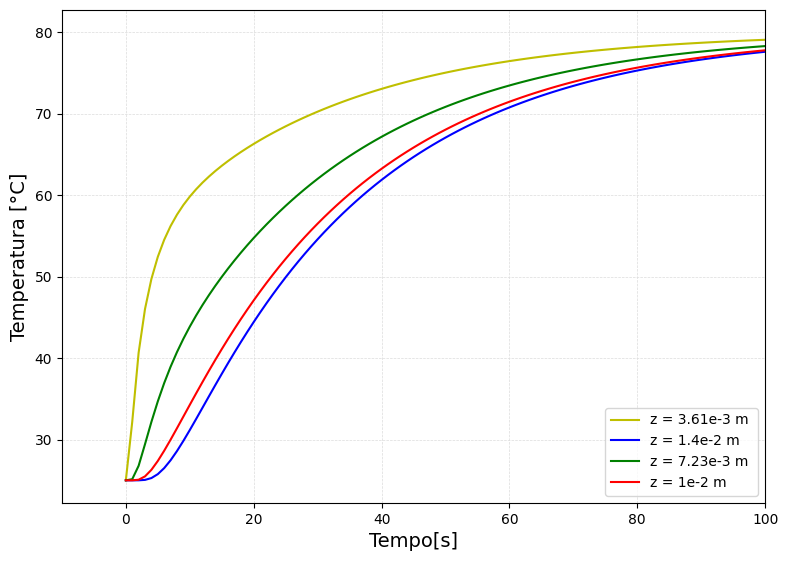

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(8., 6., forward=True)
fig.tight_layout(rect=[0.03, 0.03, 1., 0.95])
plt.plot (t, T_z10,color= 'y' ,label = 'z = 3.61e-3 m ')
plt.plot (t, T_z40, color= 'b', label = 'z = 1.4e-2 m ')
plt.plot (t, T_z20, color= 'g', label = 'z = 7.23e-3 m ')
plt.plot (t, T_z30, color= 'r', label = 'z = 1e-2 m ')
plt.xlabel('Tempo[s]', fontsize = 14)
plt.ylabel(u'Temperatura [°C]', fontsize = 14)
plt.xlim([-10,100])
plt.grid(color='gainsboro', linestyle='--', linewidth=0.5)
ax.legend(loc = 4)

## ***Nao sei se ela vai querer esse grafico***

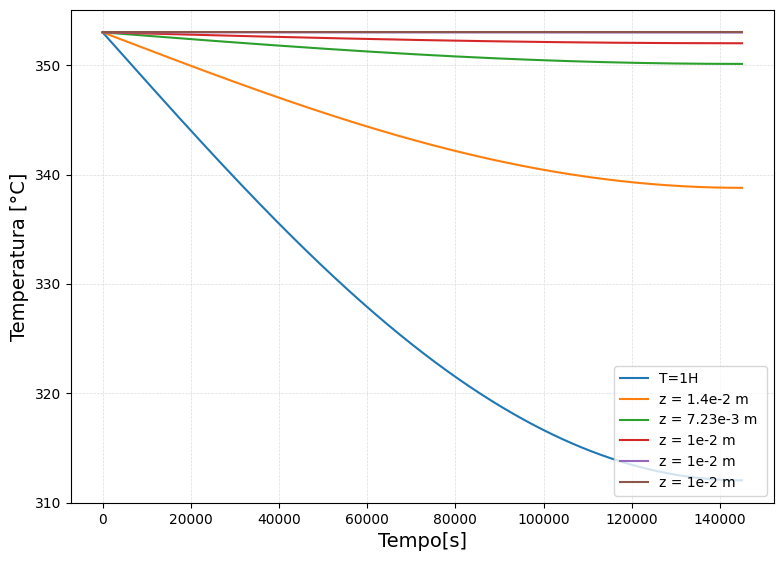

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(8., 6., forward=True)
fig.tight_layout(rect=[0.03, 0.03, 1., 0.95])
plt.plot (z*10**6, T_t1, label = 'T=1h')
plt.plot (z*10**6, T_t3, label = 'T=3h')
plt.plot (z*10**6, T_t6, label = 'z = 7.23e-3 m ')
plt.plot (z*10**6, T_t8, label = 'z = 1e-2 m ')
plt.plot (z*10**6, T_t16, label = 'z = 1e-2 m ')
plt.plot (z*10**6, T_t24, label = 'z = 1e-2 m ')
plt.xlabel('Tempo[s]', fontsize = 14)
plt.ylabel(u'Temperatura [°C]', fontsize = 14)
plt.grid(color='gainsboro', linestyle='--', linewidth=0.5)
ax.legend(loc = 4)

# Seção Variável

In [ ]:
from numpy import *
import numpy as np
from scipy.integrate import *
import matplotlib.pyplot as plt
from math import *

In [ ]:
### Propriedades do ar
T0 = 80.+273.     # Temp inicial [k]
Tamb = 25.+273.   # Temp ambiente [k]
kar = 0.02551     # Coef. condutivo Ar (W/m.K)
L = 0.145         # Comprimento (m)
cpar = 1007       #Calor Específico Cp (J/kg K)
Pr = 0.7296       #Número de Prandt
visc = 1.562e-5   #Viscosidade Cinemática  (m2/s)
g = 9.81          #Gravidade (m/s2)
B = 1/T0          # Coef. de Expasão Volumétrica

Ra = g*B*(T0 - Tamb)*Pr/pow(visc,2)

Nu =((576/pow(Ra,2))+(2.873/pow(Ra,0.5)))

h = Nu*kar/L

In [ ]:
### Propriedades aluminio
T0 = [80+273]            # Temp inicial [k]
Tamb = 25+273            # Temp ambiente [k]
w = 2e-4                 # espessura (m)
Kal = 229                # Coef. condutivo Aluminio (W/m.K)
p = 2701.1               # densidade do material (em kg/m³)
cp = 938.3               # é a capacidade calorífica específica (em J/kg·K)
tempo = 20*60            # tempo (s)
r1 = 1.0                 # Raio maximo
H = 0.05                 # Altura maxima
c = 0.10                 # Comprimento


it1 = 2401                 # número de iterações tempo
it2 = 401                  # número de iterações espaço
r = np.linspace(0,r1,it2)     # vetor raio (para cada z o raio varia de 0 até o nosso raio maximo)
z = np.linspace(0,r,it2)      # vetor do comprimento z
y = np.linspace(0,r,it2)      # vetor do comprimento y
t = np.linspace (0,tempo,it1) # vetor do tempo
dz= r/(it2-1)              # passo do método


condicao0 = concatenate([T0,(25+273)*ones(it2-1)])

In [ ]:
def resultado (h):

## Direção Z
 def dT2dz(T,dz):
  dTdz = (T[2:] + T[:-2] - 2*T[1:-1])/(dz**2)
  return (dTdz)
## Direção Y
 def dT2dy(T,dy):
  dTdy = (T[2:] - 2*T[1:-1] + T[:-2])/(dy**2)
  return (dTdy)

 def dTdt(T,t):
  Pe = 2*w+2*(np.sqrt(np.multiply(r[1:-1],r[1:-1])+np.multiply(H,H)))
  Ab = 2*(((r[1:-1])**2+(H)**2)**0.5)*w
  Ac = [(H**2*np.pi)/2*ones(it2-2)]
  dTdt = np.zeros(len(T))
  dTdt[1:-1] = (Kal/(p*cp))*(np.concatenate((np.array([0]), dT2dz(T,dz), np.array([0])))+np.concatenate((np.array([0]), dT2dy(T,dy), np.array([0]))))-((h*Pe/(p*cp*Ab))+(h*Pe/(p*cp*Ac)))*(T[1:-1]-Tamb)
  dTdt[-1] = dTdt[-2]
  return (dTdt)

 result = odeint(dTdt,condicao0,t)

 return(result)
result = resultado (h)

ValueError: operands could not be broadcast together with shapes (399,) (401,) 

In [ ]:
T_z10 = result[:,100]-273
T_z20 = result[:,200]-273
T_z30 = result[:,300]-273
T_z40 = result[:,400]-273
T_t1 = result[100,:]
T_t3 = result[300,:]
T_t6 = result[600,:]
T_t8 = result[800,:]
T_t16 = result[1600,:]
T_t24 = result[2400,:]
print (T_z40)

[25.         25.         25.         ... 41.83387146 41.84162596
 41.84937891]


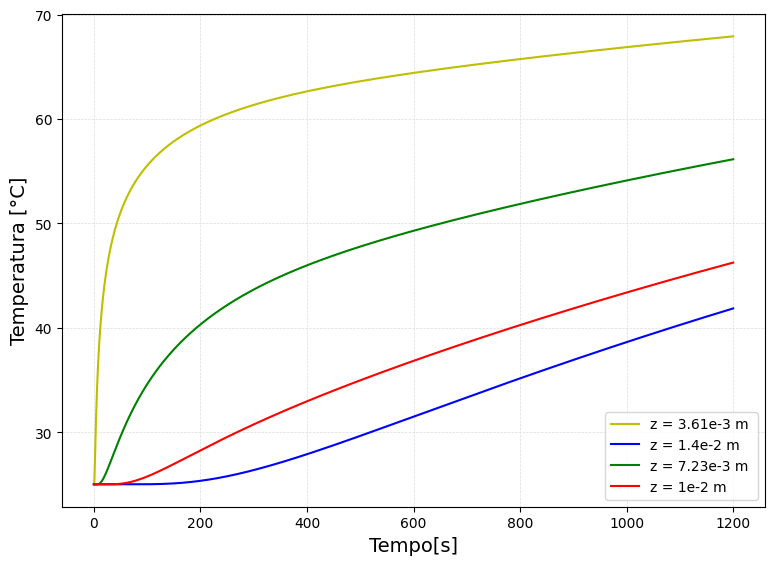

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(8., 6., forward=True)
fig.tight_layout(rect=[0.03, 0.03, 1., 0.95])
plt.plot (t, T_z10,color= 'y' ,label = 'z = 3.61e-3 m ')
plt.plot (t, T_z40, color= 'b', label = 'z = 1.4e-2 m ')
plt.plot (t, T_z20, color= 'g', label = 'z = 7.23e-3 m ')
plt.plot (t, T_z30, color= 'r', label = 'z = 1e-2 m ')
plt.xlabel('Tempo[s]', fontsize = 14)
plt.ylabel(u'Temperatura [°C]', fontsize = 14)
plt.grid(color='gainsboro', linestyle='--', linewidth=0.5)
ax.legend(loc = 4)